In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('full_grouped.csv')
df2 = df.drop(['New deaths','New recovered','WHO Region'],axis=1)
df2

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases
0,2020-01-22,Afghanistan,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0
...,...,...,...,...,...,...,...
27297,2020-06-15,West Bank and Gaza,505,3,415,87,13
27298,2020-06-15,Western Sahara,9,1,8,0,0
27299,2020-06-15,Yemen,844,208,79,557,116
27300,2020-06-15,Zambia,1382,11,1142,229,24


In [3]:
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2.drop(['Date'],axis=1,inplace=True)
df2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Year,Month,Day
0,Afghanistan,0,0,0,0,0,2020,1,22
1,Albania,0,0,0,0,0,2020,1,22
2,Algeria,0,0,0,0,0,2020,1,22
3,Andorra,0,0,0,0,0,2020,1,22
4,Angola,0,0,0,0,0,2020,1,22
...,...,...,...,...,...,...,...,...,...
27297,West Bank and Gaza,505,3,415,87,13,2020,6,15
27298,Western Sahara,9,1,8,0,0,2020,6,15
27299,Yemen,844,208,79,557,116,2020,6,15
27300,Zambia,1382,11,1142,229,24,2020,6,15


In [4]:
df2['Country-category_no'] = pd.factorize(df2['Country/Region'])[0]
df3 = df2[['Day','Month','Country/Region','Country-category_no','Confirmed','Deaths','Recovered','Active','New cases']]
df2.drop('Country-category_no',axis=1,inplace=True)
df3,df2

(       Day  Month      Country/Region  Country-category_no  Confirmed  Deaths  \
 0       22      1         Afghanistan                    0          0       0   
 1       22      1             Albania                    1          0       0   
 2       22      1             Algeria                    2          0       0   
 3       22      1             Andorra                    3          0       0   
 4       22      1              Angola                    4          0       0   
 ...    ...    ...                 ...                  ...        ...     ...   
 27297   15      6  West Bank and Gaza                  182        505       3   
 27298   15      6      Western Sahara                  183          9       1   
 27299   15      6               Yemen                  184        844     208   
 27300   15      6              Zambia                  185       1382      11   
 27301   15      6            Zimbabwe                  186        387       4   
 
        Recove

In [5]:
X = df2.drop(['New cases'],axis=1)
Y = df2['New cases']
X['Country/Region'] = pd.factorize(X['Country/Region'])[0]

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [8]:
 model.score(X_test,Y_test)

0.9264384970149739

In [9]:
from sklearn.metrics import r2_score
r2_score(Y_test, model.predict(X_test))

0.9264384970149739

In [10]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_preds)
mae

67.49932796191175

In [11]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_preds)
mse

246413.3970872917

In [12]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_mae = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -179.55


In [13]:
np.random.seed(42)
cv_mse = cross_val_score(model,  X,Y, cv=5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -1298933.49


In [14]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.45


In [15]:
grid = {'n_estimators':[10,100,200,500,1000,1200],
       'max_depth':[None,5,10,20,30],
       'max_features':['auto','sqrt'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,4]}

In [16]:
from sklearn.model_selection import RandomizedSearchCV
regressor = RandomForestRegressor(n_jobs=1)
model2 = RandomizedSearchCV(estimator=regressor,
                         param_distributions=grid,
                         cv=5,
                         verbose=2)
model2.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=  10.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=  11.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=  11.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=  11.0s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=  11.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  21.8s
[CV] n_estimators=1000, min_samples_

[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=  32.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=1,
                    

In [17]:
model2.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [18]:
model2.score(X_test,Y_test)

0.9278189929971936

In [19]:
df2['Country/Region'] = pd.factorize(df2['Country/Region'])[0]
dfindia = df2[df2['Country/Region']==79]
x_india = dfindia.drop(['New cases'],axis=1)
y_india = dfindia['New cases']

In [20]:
y_pred_india = model.predict(x_india)
dataframe = pd.DataFrame({'Actual Value':y_india,'Predicted':y_pred_india})

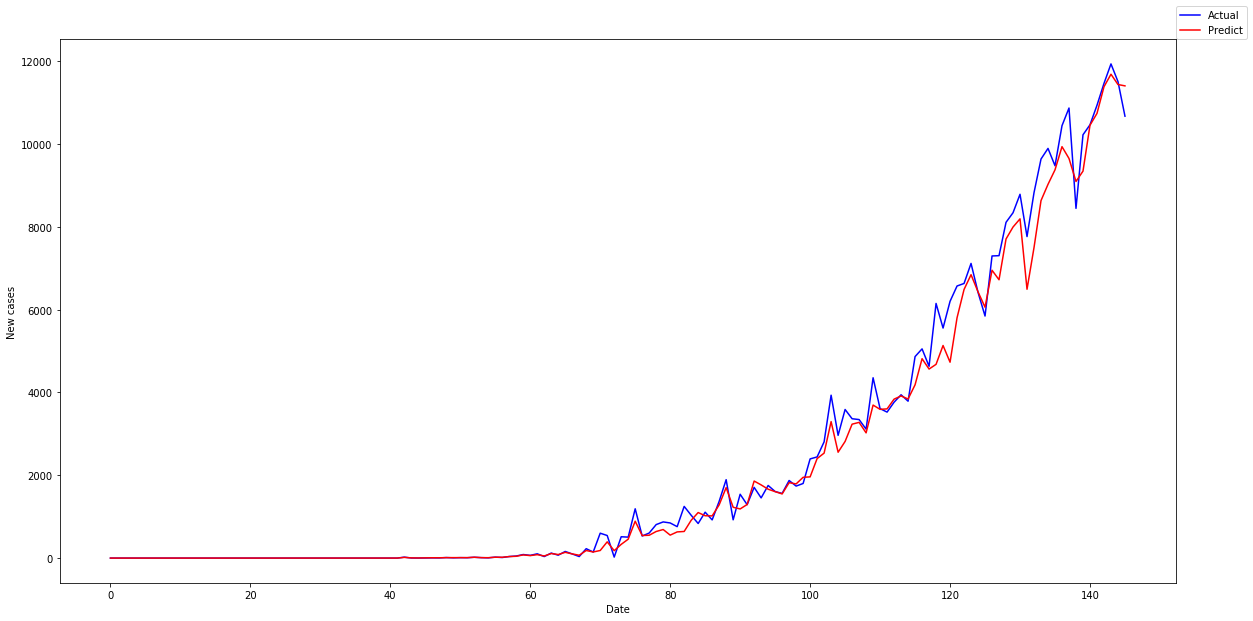

In [21]:
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1))

In [22]:
df2['Country/Region'] = pd.factorize(df2['Country/Region'])[0]
dfchina = df2[df2['Country/Region']==36]
x_china = dfchina.drop(['New cases'],axis=1)
y_china = dfchina['New cases']
x_china,y_china

(       Country/Region  Confirmed  Deaths  Recovered  Active  Year  Month  Day
 36                 36        548      17         28     503  2020      1   22
 223                36        643      18         30     595  2020      1   23
 410                36        920      26         36     858  2020      1   24
 597                36       1406      42         39    1325  2020      1   25
 784                36       2075      56         49    1970  2020      1   26
 ...               ...        ...     ...        ...     ...   ...    ...  ...
 26403              36      84216    4638      79464     114  2020      6   11
 26590              36      84228    4638      79472     118  2020      6   12
 26777              36      84286    4638      79475     173  2020      6   13
 26964              36      84335    4638      79482     215  2020      6   14
 27151              36      84378    4638      79489     251  2020      6   15
 
 [146 rows x 8 columns],
 36         0
 223       

In [23]:
y_pred_china = model.predict(x_china)
dataframe = pd.DataFrame({'Actual Value':y_china,'Predicted':y_pred_china})
dataframe

,Actual Value,Predicted
36,0,57.76
223,95,130.55
410,277,256.90
597,486,406.61
784,669,554.48
...,...,...
26403,7,7.52
26590,12,8.71
26777,58,51.69
26964,49,48.28


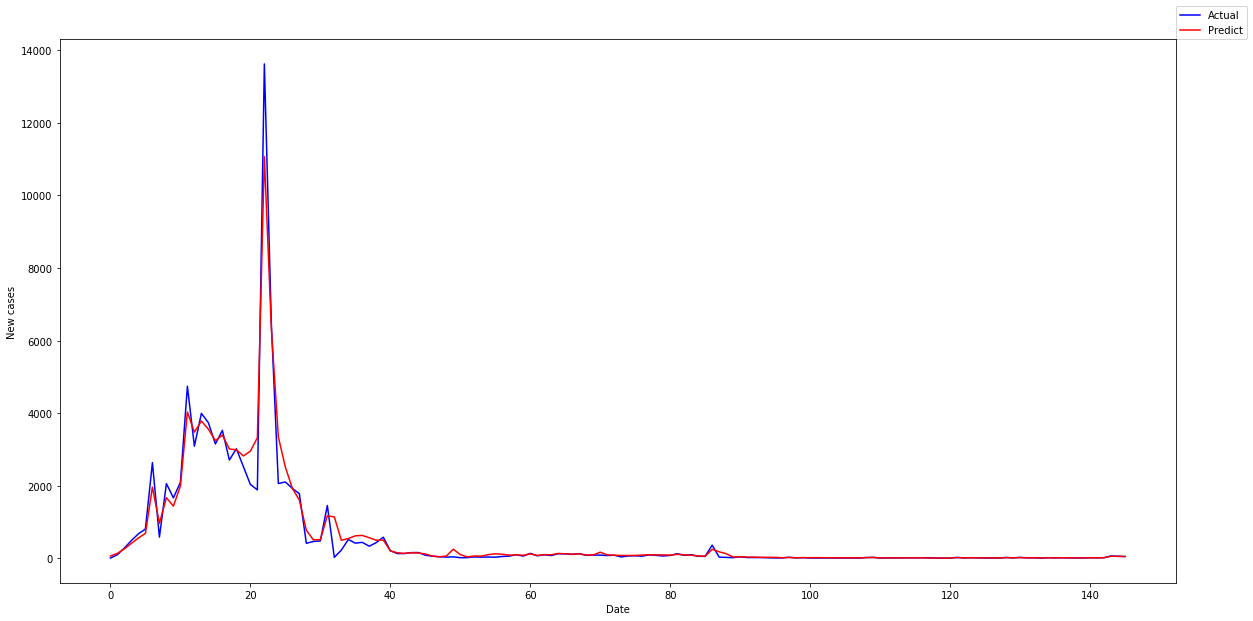

In [24]:
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));